# 3-Layer Neural Network

* 3-Layer Neural Network form scratch using Pytorch(Without using built in functionalities)

In [1]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

# Non-Linearity

* Consider a non-linear equation 
y = 3x1 - x2 + 0.5x3 + 1.5, where w0, w1, w3, b = 3, -1, 0.5, 1.5

In [3]:
n = 100  # number of sample

d = 3  # 3-dimensional

x = 2 * torch.rand((n, d)) - 1
x

tensor([[-0.8462,  0.8185,  0.2074],
        [-0.8793,  0.7743, -0.4703],
        [-0.5505,  0.8153, -0.4916],
        [ 0.5584, -0.2497, -0.3027],
        [-0.1796, -0.6687,  0.4382],
        [-0.4523,  0.9435, -0.5917],
        [ 0.6144,  0.5850, -0.0422],
        [ 0.8231,  0.8269,  0.2594],
        [-0.7641,  0.8995, -0.8172],
        [ 0.9384,  0.8721,  0.4864],
        [ 0.8401,  0.2300, -0.7276],
        [-0.9113, -0.8528, -0.8661],
        [ 0.5314,  0.8973, -0.1857],
        [ 0.3210, -0.3707, -0.3976],
        [-0.6793, -0.0059,  0.6521],
        [-0.5379, -0.2962,  0.1288],
        [-0.4553, -0.1629, -0.3803],
        [-0.8560,  0.2405,  0.2250],
        [-0.6153, -0.0727, -0.1182],
        [ 0.6734, -0.1015,  0.9692],
        [-0.9319,  0.5104, -0.7756],
        [ 0.8830,  0.3247,  0.9548],
        [-0.9476,  0.4535, -0.2850],
        [-0.7869,  0.4268,  0.3740],
        [ 0.9266,  0.4538, -0.6153],
        [-0.6791,  0.3230, -0.7082],
        [-0.2348,  0.4820,  0.2281],
 

x: torch.Size([100, 3]), weights: torch.Size([3, 1]), bias: torch.Size([1]), y: torch.Size([100, 1])


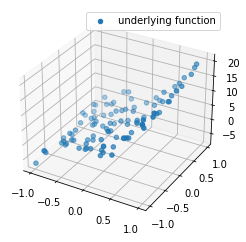

In [4]:
#y = 3x^3 - x^2 + 0.5x + 1.5

#weights_true = np.array([[3, -1, 0.5],]).T
#bias_true = np.array([1.5])

n, d = 100, 3

x = 2 * torch.rand((n, d)) - 1

weights_true = torch.tensor([[6], [1], [1]], dtype=torch.float32)
bias_true = torch.tensor([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_4d(X, y, y_pred=None):
 # Compute a 3D embedding of the data using UMAP
  umap_3d = umap.UMAP(n_components=3)
  X_umap_3d = umap_3d.fit_transform(X)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_4d(x, y_true)

In [5]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    self.weights = torch.randn(input_dim, num_hidden) * torch.sqrt(torch.tensor(2.0 / input_dim))
    self.bias = torch.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

# MSE

In [6]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

# Back Propagation

In [7]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = torch.randn(input_dim, num_hidden) * torch.sqrt(torch.tensor(2.0 / input_dim))
    self.bias = torch.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [8]:
from typing import Callable

def fit(x: torch, y: torch, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)


Epoch 0, loss 49.208282470703125
Epoch 1, loss 41.366024017333984
Epoch 2, loss 35.286834716796875
Epoch 3, loss 30.4715576171875
Epoch 4, loss 26.583974838256836
Epoch 5, loss 23.39398193359375
Epoch 6, loss 20.7410945892334
Epoch 7, loss 18.5109920501709
Epoch 8, loss 16.620325088500977
Epoch 9, loss 15.006844520568848
Epoch 10, loss 13.622936248779297
Epoch 11, loss 12.431354522705078
Epoch 12, loss 11.402366638183594
Epoch 13, loss 10.511801719665527
Epoch 14, loss 9.739728927612305
Epoch 15, loss 9.069504737854004
Epoch 16, loss 8.487102508544922
Epoch 17, loss 7.980601787567139
Epoch 18, loss 7.5398268699646
Epoch 19, loss 7.156042098999023
Epoch 20, loss 6.821723461151123
Epoch 21, loss 6.5303802490234375
Epoch 22, loss 6.276394844055176
Epoch 23, loss 6.054903984069824
Epoch 24, loss 5.861689567565918
Epoch 25, loss 5.693089008331299
Epoch 26, loss 5.545924186706543
Epoch 27, loss 5.417431831359863
Epoch 28, loss 5.305209159851074
Epoch 29, loss 5.207167148590088
Epoch 30, loss

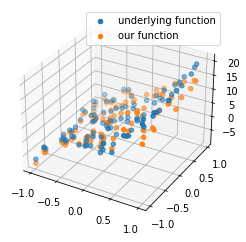

In [9]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, linear(x))

# To avoid this underfitting, introduce relu layer where it clips all the values less than 0 to 0 and leaves the rest as is.

In [10]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = torch.clamp(input_, min=0, max=float('inf'))
        #self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = [1, 0.5, 0, -0.5, -1]
input_tensor = torch.tensor(input_).unsqueeze(1)
#input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_tensor))
print(relu.backward(input_tensor))

tensor([[1.0000],
        [0.5000],
        [0.0000],
        [0.0000],
        [0.0000]])
tensor([[1.0000],
        [0.5000],
        [0.0000],
        [-0.0000],
        [-0.0000]])


tensor(48.1925)


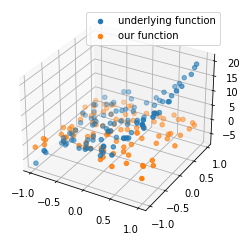

In [11]:
import torch

class Model:
  def __init__(self, input_dim, num_hidden1):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden1)
    self.linear3 = Linear(num_hidden1, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient2 = self.relu.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu_gradient2)
    relu_gradient1 = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient1)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 20)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_4d(x, y_true, y_pred)

In [12]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.01)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(50.7290)
tensor(48.8504)


Epoch 0, loss 48.85041809082031
Epoch 1, loss 47.34188461303711
Epoch 2, loss 46.06596755981445
Epoch 3, loss 45.01460266113281
Epoch 4, loss 44.05069351196289
Epoch 5, loss 43.12710952758789
Epoch 6, loss 42.1937141418457
Epoch 7, loss 41.212371826171875
Epoch 8, loss 40.1320686340332
Epoch 9, loss 38.894466400146484
Epoch 10, loss 37.485321044921875
Epoch 11, loss 35.89327621459961
Epoch 12, loss 34.0974006652832
Epoch 13, loss 32.08281326293945
Epoch 14, loss 29.833662033081055
Epoch 15, loss 27.34320831298828
Epoch 16, loss 24.64051055908203
Epoch 17, loss 21.785837173461914
Epoch 18, loss 18.87763214111328
Epoch 19, loss 16.052684783935547
Epoch 20, loss 13.451282501220703
Epoch 21, loss 11.184679985046387
Epoch 22, loss 9.298794746398926
Epoch 23, loss 7.789105415344238
Epoch 24, loss 6.615237236022949
Epoch 25, loss 5.715885639190674
Epoch 26, loss 5.019400119781494
Epoch 27, loss 4.465099334716797
Epoch 28, loss 4.020925521850586
Epoch 29, loss 3.656679630279541
Epoch 30, loss 

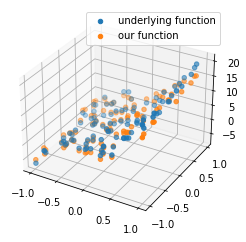

In [13]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=40)
plot_4d(x, y_true, model(x))

* With learning rate = 0.01, our model fits well with the data points.